In [1]:
import matplotlib.pyplot as plt

import skimage.io as io
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.filters import threshold_mean, sobel
from skimage.color import rgb2gray
from skimage import feature

import pandas as pd
import math
from typing import *
from skimage.color import rgb2gray
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage.transform import hough_line, hough_line_peaks
from scipy import ndimage
from skimage import measure, feature, io, color, draw, segmentation
from skimage.feature import hog
from utils.image_utils import *

base_dir = "../../data"

image_db = pd.read_csv(f'{base_dir}/ODIR-5K/data.csv')
normal = io.imread(f'{base_dir}/preprocessed_images/0_right.jpg')
cataract = io.imread(f'{base_dir}/preprocessed_images/0_left.jpg')
opacity = io.imread(f'{base_dir}/preprocessed_images/156_left.jpg')

normal2 = io.imread(f'{base_dir}/preprocessed_images/173_left.jpg')
cataract2 = io.imread(f'{base_dir}/preprocessed_images/188_right.jpg')
opacity2 = io.imread(f'{base_dir}/preprocessed_images/218_left.jpg')


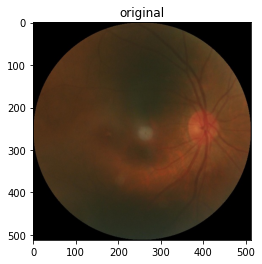

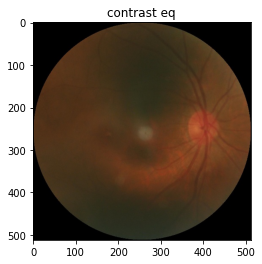

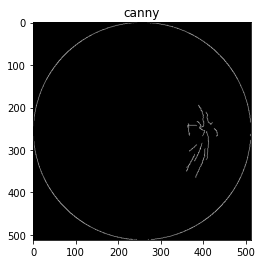

False


In [2]:
#eq_normal = contrast_equalization(normal)
#has_veins(eq_normal)

file='0_right.jpg'
#file='103_left.jpg'
img = io.imread(f'{base_dir}/preprocessed_images/{file}')

print_img('original', img)

print_img('contrast eq', img)
img = contrast_equalization(img, adjust_if_lower=False)

veins =  feature.canny(rgb2gray(img), sigma=0.001)
print_img('canny', veins)
veins[veins > 0] = 255

print(is_strong_solid_opacity(img))


#print(has_veins(img))

In [3]:
eq_normal = contrast_equalization(normal)
eq_normal2 = contrast_equalization(normal2)
eq_cataract = contrast_equalization(cataract)
eq_cataract2 = contrast_equalization(cataract2)
eq_opacity = contrast_equalization(opacity)
eq_opacity2 = contrast_equalization(opacity2)

eq_normal = color.rgb2hsv(eq_normal)
eq_normal2 = color.rgb2hsv(eq_normal2)
eq_cataract = color.rgb2hsv(eq_cataract)
eq_cataract2 = color.rgb2hsv(cataract2)
eq_opacity = color.rgb2hsv(opacity)
eq_opacity2 = color.rgb2hsv(opacity2)

print (specularity_pixels_count(eq_normal))
print (specularity_pixels_count(eq_normal2))
print (specularity_pixels_count(eq_cataract))
print (specularity_pixels_count(eq_cataract2))
print (specularity_pixels_count(eq_opacity))
print (specularity_pixels_count(eq_opacity2))



43292
77328
0
2923
63048
25395


In [ ]:
def build_feature_df(image_db: pd.DataFrame) -> pd.DataFrame:
    result = {}
    for idx, row in image_db.iterrows():
        if (max == 0): break
    max -= 1
    try:
        file = row['Left-Fundus']
        img = io.imread(f"{base_dir}/preprocessed_images/{file}")
        img = contrast_equalization(img, adjust_if_lower=False)
        result['id'] = file
        features = find_hog(img)

        print (f'cataract/opacity {file}')
    except:
        print (f'not found {file}')

In [6]:
file='0_right.jpg'
#file='103_left.jpg'
img = io.imread(f'{base_dir}/preprocessed_images/{file}')
features = find_hog(img)
print (features.shape)

[0. 0. 0. ... 0. 0. 0.]


In [4]:
cataract_opacity = []
max = 9000
true_positive_cataract_count = 0


for idx, row in image_db.iterrows():
    if (max == 0): break
    max -= 1
    try:
        file = row['Left-Fundus']
        img = io.imread(f"{base_dir}/preprocessed_images/{file}")
        img = contrast_equalization(img, adjust_if_lower=False)
        if (not is_strong_solid_opacity(img)): continue
        specularity_count = specularity_pixels_count(color.rgb2hsv(img))
        cataract_opacity.append((file, specularity_count))
        if (row['C'] == 1):
            true_positive_cataract_count += 1
        print (f'cataract/opacity {file}')
    except:
        print (f'not found {file}')


Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1078, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 297, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/usr/local/lib/python3.8/dist-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/usr/local/lib/python3.8/dist-packages/debugpy/_vendored/pydevd/pydevd.py", line 2011, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 

In [5]:
total = len(image_db[image_db['C'] == 1])
print(f'acerto: {100*true_positive_cataract_count/total}%')
true_positive_cataract_count
#print (cataract_opacity)

acerto: 41.0377358490566%


87

In [6]:
len(image_db[image_db['C'] == 1])

212